<a href="https://colab.research.google.com/github/clizarraga-UAD7/Notebooks/blob/main/ExploratoryDataAnalysisExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis Example (White + Red wines).

In 2009, Portuguese scientists collected a massive inventory of different Vinho Verde wines. In an extraordinary gift to the community, they made their dataset public.

It contains data on more than 5,000 kinds of wine, and measures 11 different physiochemical properties.

Reference: https://archive-beta.ics.uci.edu/ml/datasets/wine+quality 

In [19]:
# Import necessary Python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# SHIF+ENTER to execute cells


# White & Red Wines Quality

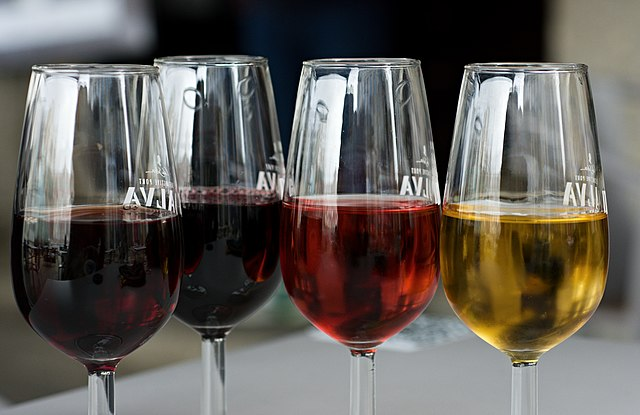

### White & Red Wines Example

In [3]:
# Read the red and white wine properties from datasets in Github
filename_white = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/winequality-white.csv"
filename_red = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/winequality-red.csv"

# Viewing the wine data files, the values are separated by ';'. We tell this to the pd.read_csv function.

white_wine_df_orig = pd.read_csv(filename_white, sep=';')
red_wine_df_orig = pd.read_csv(filename_red, sep=';')


In [4]:
white_wine_df_orig.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine_df_orig.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Some wine properties in context**:

- **Fixed Acidity**: Gives wine a tart flavor. If there’s too little, wine tastes “flat”.
- **Citric Acid**: Often used as a flavor additive. Adds a fresh, tart taste.
- **Volatile Acidity**: In contrast to citric acid, which is a liquid, this is gaseous acidity that can smell like vinegar. Its presence is less likely to be intentional.
- **Residual Sugar**: This is the sugar left over when grapes finish fermenting. Correlates with sweetness. “Dry wines” tend to have lower amounts.
- **Sulfur**: Additive to prevent bacterial growth. In my research, it was contested whether or not there is a smell or taste associated with it.
- **Chlorides**: The measure of salt.

***

Next, we pretend to join the two above dataframes, into a single one, so we can do comparisons.

In order to do this, will create a new column for each dataframe, defining the type of wine (white or red). 


In [ ]:
# Adding a new column for each dataframe, defining the type of w¡ne.
# and preserving original data

white_wine_df = white_wine_df_orig.copy()
red_wine_df = red_wine_df_orig.copy()

white_wine_df['type'] = 'white'
red_wine_df['type'] = 'red'


In [ ]:
# Now we check each dataframe general structure

white_wine_df.info()


In [ ]:
# Same as above

red_wine_df.info()


We have two dataframes with the same number and names of columns, one having 4898 lines (white wine) and trhe other having 1599 lines (red wines). 

There are several ways we combine dataframes to create a new one, these are described by the functions [concatenating, joining, merging and comparing](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) dataframes.

We want to add the red wines dataframe at the end of the white wines dataframe. This can be performed by the function *concatenate*.


In [ ]:
# Will concatenate the red_wines_df at the end of white_wines_df

frames = [white_wine_df, red_wine_df]

# Since each data frame has different size, we need to re-index the new dataframe.
wines_df = pd.concat(frames, ignore_index=True)

wines_df.info()


So now we have a single dataframe that include both wine type datasets.

### Histograms

In [ ]:
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [ ]:
wines_df.groupby(["quality", "type"]).head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,red
5415,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,red
5588,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,red
5730,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,red


quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
dtype: int64

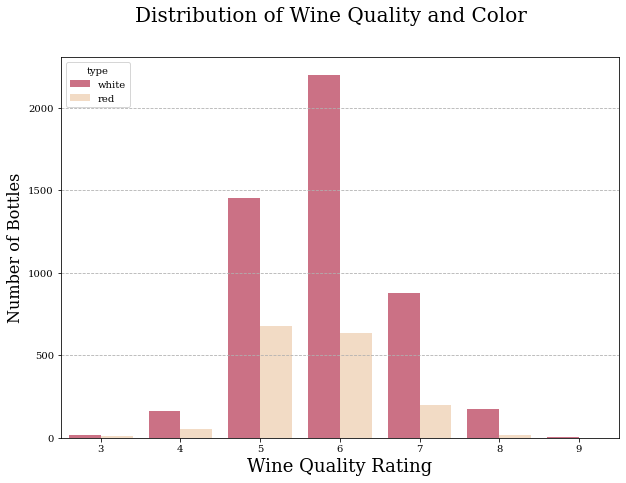

In [ ]:
# Then graph the distribution so we see how may red vs white bottles we have

#define figure size in (width, height) and fonts for all plots
plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('font', family='serif')
# Define a Seaborn style for this plot
#sns.set_style("whitegrid")


plt.suptitle("Distribution of Wine Quality and Color", fontsize=20)
plt.xlabel("xlabel", fontsize=18)
plt.ylabel("ylabel", fontsize=16)
plt.grid(True, linestyle='--')

# We introduce the Seaborn graphics library based on Matplotlib.
# the sns.countplot will produce histograms. 
ax = sns.countplot(
    x="quality", hue="type", data=wines_df, palette=["#da627d", "#f9dbbd"]
)
ax.set(xlabel="Wine Quality Rating", ylabel="Number of Bottles")

# Print the wines distribution by quality and type and compute sizes
wines_df.groupby(["quality", "type"]).size()


# Outlier detection using Tuckey Criteria.

There are several known methods to identify outliers, but we will use Tukey criteria for outliers definition. 

Tukey outlier criteria uses the interquartile range (“IQR”) to flag observations that are considered outliers. 

Tukey outlier  defines an outlier based on the below formula:

\begin{equation}
{\rm Outlier} = \Bigg\{ \begin{matrix}
  {\rm if \, value} & < & Q_{1} - 1.5 \, IQR \\
  {\rm or} & & \\
  {\rm if \, value} & > & Q_{3} + 1.5 \, IQR \\
\end{matrix} 
\end{equation}


where $Q_{1}$ and $Q_{3}$, represent the first and third quartile position, and the interquartile range  $IQR = Q_{3} - Q_{1}$






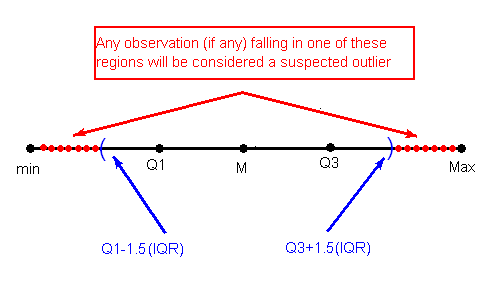

In [ ]:
# Outlier identification: Red Wine case
# calculate interquartile range IQR

dataRed = red_wine_df.copy()
dataRedColsList = dataRed.columns[0:12]

for i_col in dataRedColsList:
  dataRed_i = dataRed.loc[:,i_col]  
  q25, q75 = dataRed_i.quantile(q=0.25), dataRed_i.quantile(q=0.75)
  IQR = q75 - q25
  print(' ')
  print(i_col, 'q25=', q25, 'q75=', q75, 'IQR=', IQR)

  # calculate the outlier cutoff
  cut_off = IQR * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  print('lower, upper:', lower, upper)

  # Count the number of outliers outside the (lower, upper) limits
  print('Number of Outliers: ', dataRed_i[(dataRed_i < lower) | (dataRed_i > upper)].count())


 
fixed acidity q25= 7.1 q75= 9.2 IQR= 2.0999999999999996
lower, upper: 3.95 12.349999999999998
Number of Outliers:  49
 
volatile acidity q25= 0.39 q75= 0.64 IQR= 0.25
lower, upper: 0.015000000000000013 1.0150000000000001
Number of Outliers:  19
 
citric acid q25= 0.09 q75= 0.42 IQR= 0.32999999999999996
lower, upper: -0.4049999999999999 0.9149999999999999
Number of Outliers:  1
 
residual sugar q25= 1.9 q75= 2.6 IQR= 0.7000000000000002
lower, upper: 0.8499999999999996 3.6500000000000004
Number of Outliers:  155
 
chlorides q25= 0.07 q75= 0.09 IQR= 0.01999999999999999
lower, upper: 0.04000000000000002 0.11999999999999998
Number of Outliers:  112
 
free sulfur dioxide q25= 7.0 q75= 21.0 IQR= 14.0
lower, upper: -14.0 42.0
Number of Outliers:  30
 
total sulfur dioxide q25= 22.0 q75= 62.0 IQR= 40.0
lower, upper: -38.0 122.0
Number of Outliers:  55
 
density q25= 0.9956 q75= 0.997835 IQR= 0.002234999999999987
lower, upper: 0.9922475000000001 1.0011875
Number of Outliers:  45
 
pH q25= 3.21

## Additional Seaborn Plots 

### Multivariable Boxplots

In [ ]:
dataRed.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
#melt data frame into long format
red_wine_df_melted = pd.melt(red_wine_df_orig)

#view first 10 rows of melted data frame
red_wine_df_melted.head(10)


,variable,value
0,fixed acidity,7.4
1,fixed acidity,7.8
2,fixed acidity,7.8
3,fixed acidity,11.2
4,fixed acidity,7.4
5,fixed acidity,7.4
6,fixed acidity,7.9
7,fixed acidity,7.3
8,fixed acidity,7.8
9,fixed acidity,7.5


In [ ]:
red_wine_df_melted['value'] = pd.to_numeric(red_wine_df_melted['value'], errors='coerce')
red_wine_df_melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19188 entries, 0 to 19187
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variable  19188 non-null  object 
 1   value     19188 non-null  float64
dtypes: float64(1), object(1)
memory usage: 299.9+ KB


In [ ]:
red_wine_df_melted.tail()


,variable,value
19183,quality,5.0
19184,quality,6.0
19185,quality,6.0
19186,quality,5.0
19187,quality,6.0


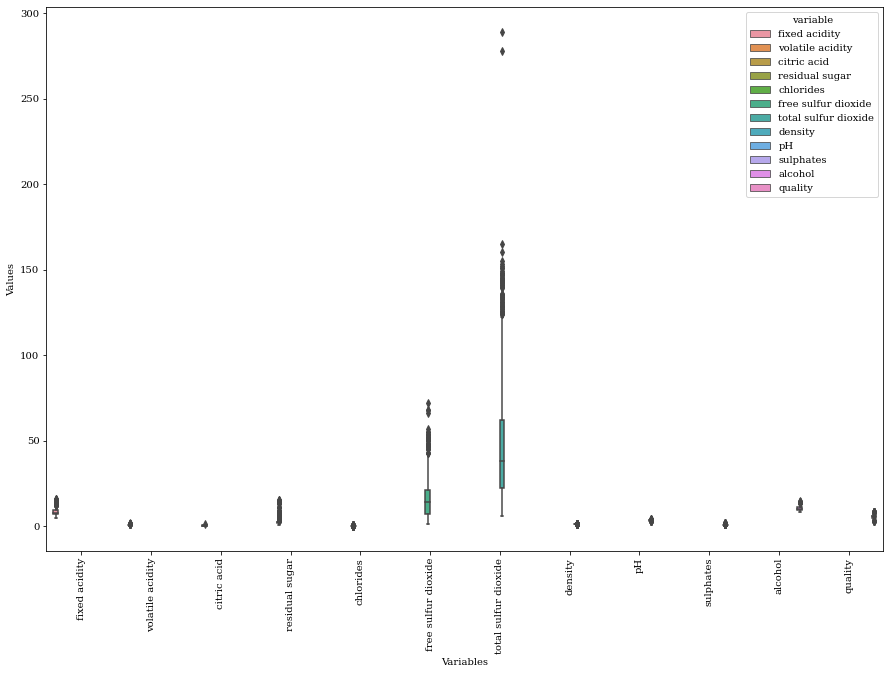

In [ ]:
#define figure size in (width, height) and fonts for all plots
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', family='serif')

#create seaborn boxplots by group
#sns.boxplot(data=red_wine_df_melted, x='variable', y='value', hue='variable', width=0.80)

sns.boxplot( x=red_wine_df_melted['variable'], y=red_wine_df_melted['value'], hue=red_wine_df_melted['variable'], width=0.80);

plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.title('Red wine components boxplot')
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();


No handles with labels found to put in legend.


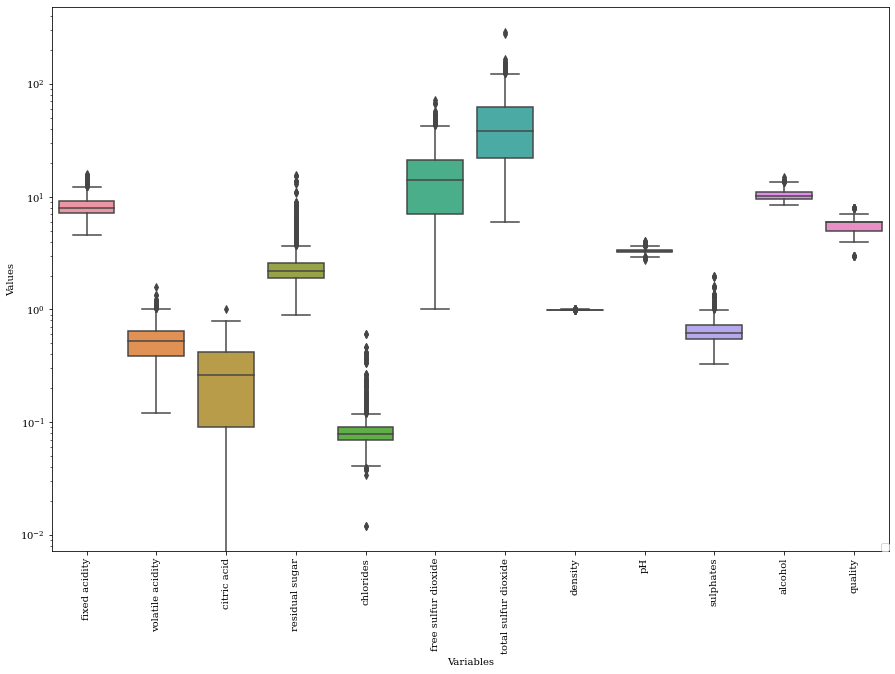

In [ ]:
#define figure size in (width, height) and fonts for all plots
plt.rcParams['figure.figsize'] = [15, 10]
plt.rc('font', family='serif')

#create seaborn boxplots by group
#sns.boxplot(data=red_wine_df_melted, x='variable', y='value', hue='variable', width=1.0)

sns.boxplot( x=red_wine_df_melted['variable'], y=red_wine_df_melted['value'], width=0.80);

plt.xlabel("Variables")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.yscale('log')

# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5), loc=4, borderaxespad=0.)
plt.show();


What makes a good wine? Is it its Chemistry?

### Bar Plots

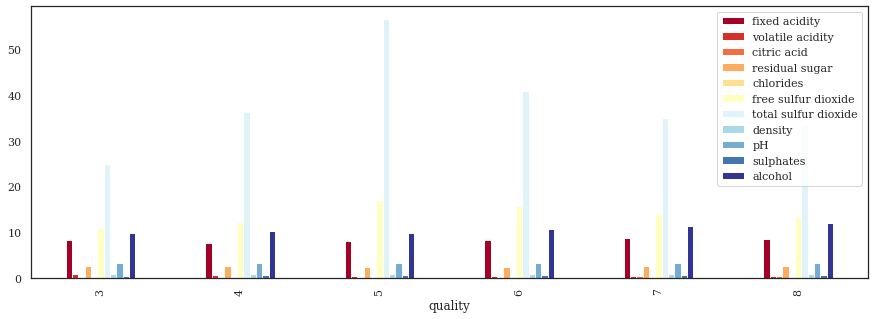

In [ ]:
# Plot without stacking bar plot for each quality group. 
# The red wines dataframe is grouped by quality, 
red_wine_df.groupby(["quality"]).mean().plot.bar(
    stacked=False, cmap="RdYlBu", figsize=(15, 5)
)
plt.show();


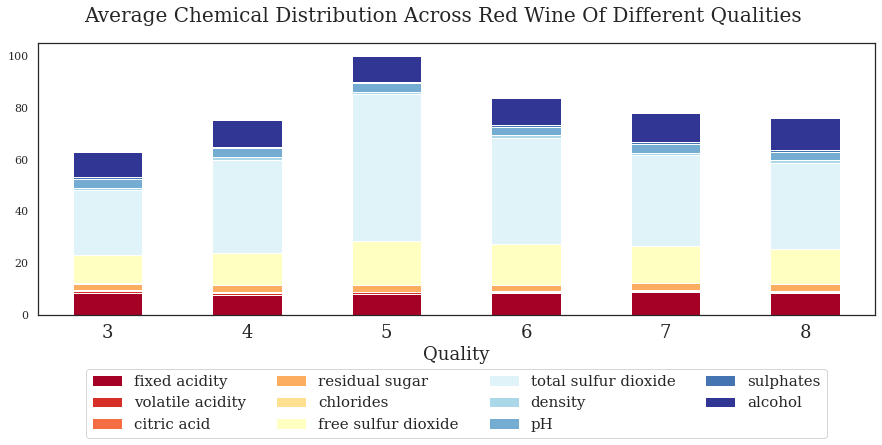

In [ ]:
# We analyze red wines
# The red wines dataframe is grouped by quality, compute the mean for each group and
# do a bar plot of average values, then stack the bars into a single bar for every quality group. 
red_wine_df.groupby(["quality"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)
plt.show();


There seems to be no distinction between a quality 4 and quality 7 or 8 wine seeing these type of plots.

We can now classify into 3 main categories.

- Terrible wine: Quality <= 4
- Phenomenal wine: Quality >= 7
- Average: Quality 5 or 6


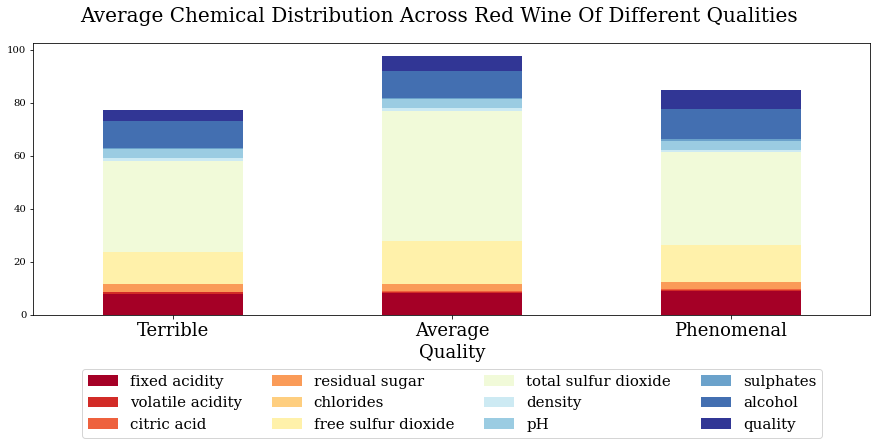

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
category,,,,,,,,,,,,
Terrible,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
Average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
Phenomenal,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [ ]:

# Make a backup copy of red wine dataframe

red_wine_df_new = red_wine_df.copy()

#Let's break it down into 3 different wine categories, for each type
#Beginning with red
category = []

for row in red_wine_df_new['quality']:
        if row >= 7 :    category.append('Phenomenal')
        elif row <=4:  category.append('Terrible')
        
        else:
            category.append('Average')
            
red_wine_df_new['category'] = category

# Then remove the rating since we no longer need to differentiate based off of it
red_wine_df_new.drop(['quality'], axis=1)


#Let's customize how the X axis is sorted. Given they're categorical variables, I want them in a very
#Specific order now.
red_wine_df_new['category'] = pd.Categorical(red_wine_df_new['category'], ['Terrible', 'Average', 'Phenomenal'])
red_wine_df_new=red_wine_df_new.sort_values(by='category')


# And last, let's group it by quality category
red_wine_df_new.groupby(["category"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5))


plt.rcParams['font.family'] = "serif"
plt.suptitle('Average Chemical Distribution Across Red Wine Of Different Qualities', fontsize=20)
plt.xticks(size = 18, rotation = 'horizontal')
plt.xlabel('Quality', fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol= 4, fontsize = 15)
plt.show();

red_wine_df_new.groupby("category").mean()



A phenomenal wine has less volatile acidity, more citric acid, less salt, and more alcohol 🍷... that is a better answer. 

### Scatter plots 


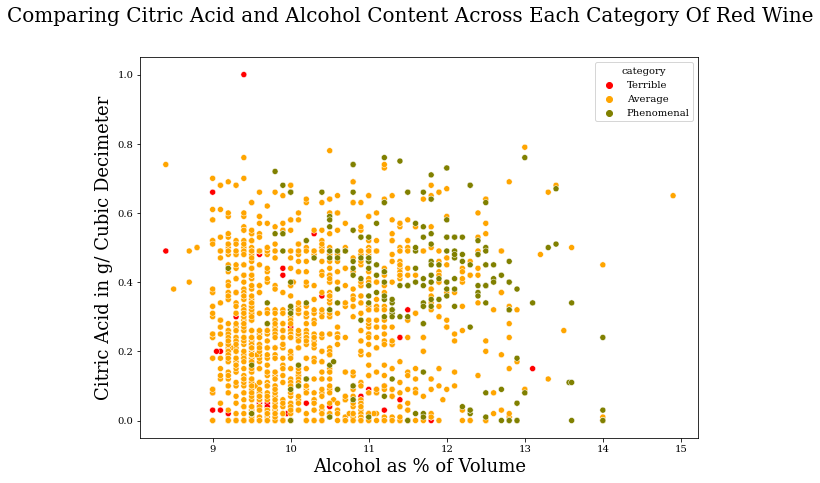

In [ ]:
#import warnings
#warnings.simplefilter(action="ignore", category=FutureWarning)

sns.scatterplot(
    x="alcohol",
    y="citric acid",
    data=red_wine_df_new,
    palette=["red", "orange", "olive"],
    hue="category",
)


plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Comparing Citric Acid and Alcohol Content Across Each Category Of Red Wine",
    fontsize=20,
)

plt.xlabel("Alcohol as % of Volume", size=18)
plt.ylabel("Citric Acid in g/ Cubic Decimeter", size=18)

plt.title("", size=24)
plt.show();


### Relational Plots


<Figure size 720x504 with 0 Axes>

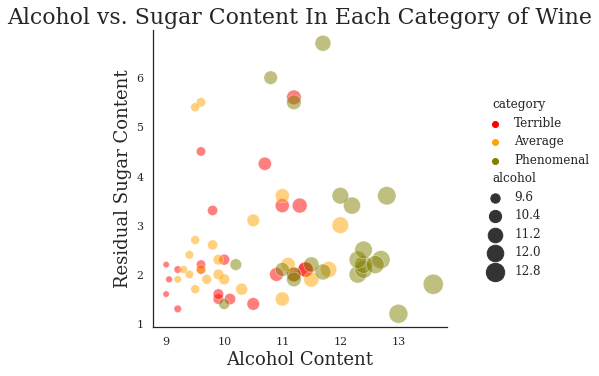

In [ ]:
# Because there's an imbalance of wines in the dataset, let's only grab 20 of each category so it doesn't skew the plot
plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Average Chemical Distribution Across Red Wine Of Different Qualities", fontsize=20
)

sns.relplot(
    x="alcohol",
    y="residual sugar",
    hue="category",
    size="alcohol",
    sizes=(40, 400),
    alpha=0.5,
    palette=["red", "orange", "olive"],
    height=5,
    data=red_wine_df_new.groupby("category")
    .apply(lambda x: x.sample(22))
    .reset_index(drop=True),
)

plt.xlabel("Alcohol Content", size=18)
plt.ylabel("Residual Sugar Content", size=18)

plt.title("Alcohol vs. Sugar Content In Each Category of Wine", size=22)
plt.show();



### Correlation Heatmaps


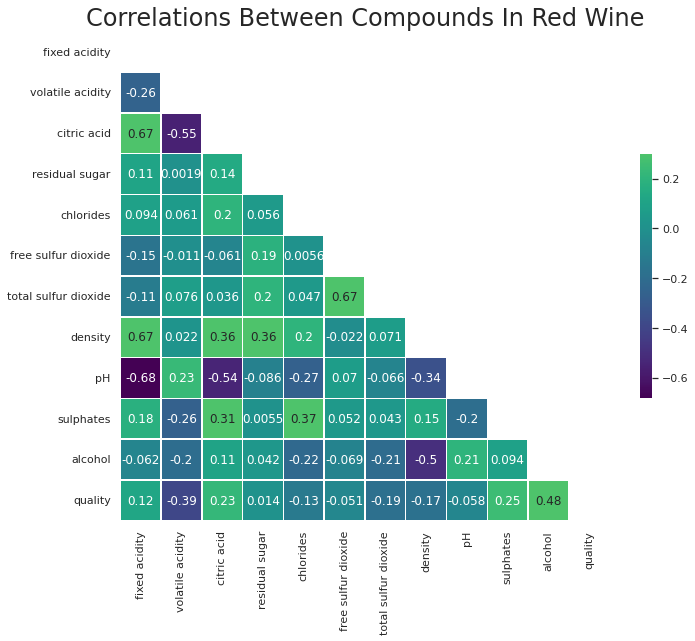

In [ ]:
sns.set_theme(style="white")

corr = red_wine_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="viridis",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In Red Wine", size=24)
plt.show();


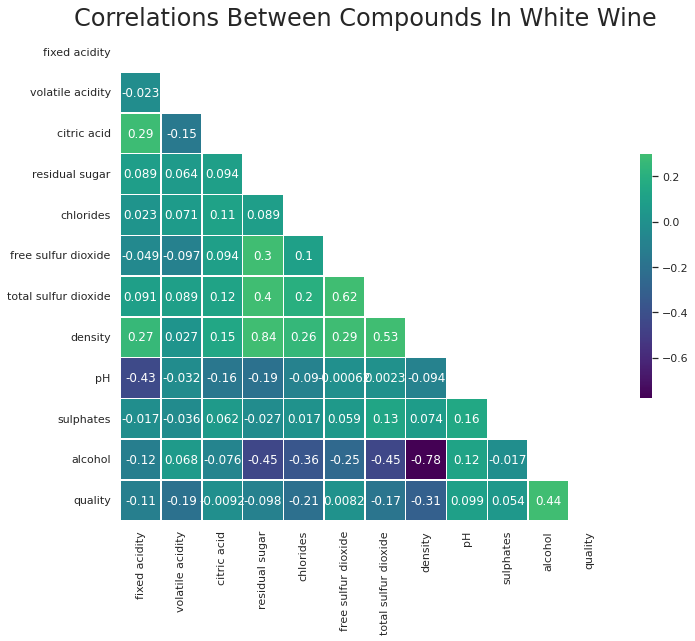

In [ ]:
sns.set_theme(style="white")

corr = white_wine_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap="viridis",
    annot=True,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.title("Correlations Between Compounds In White Wine", size=24)
plt.show();


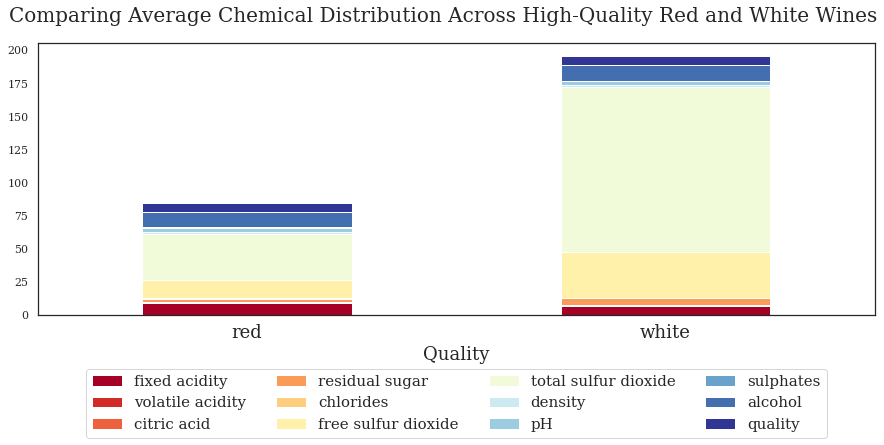

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949
white,6.725142,0.265349,0.326057,5.261509,0.038160,34.550472,125.245283,0.992412,3.215132,0.500142,11.416022,7.174528


In [ ]:
# We analyze red wines
# The red wines dataframe is grouped by quality, compute the mean for each group and
# do a bar plot of average values, then stack the bars into a single bar for every quality group. 
wines_df[wines_df['quality'] >= 7].groupby(["type"]).mean().plot.bar(
    stacked=True, cmap="RdYlBu", figsize=(15, 5)
)

plt.rcParams["font.family"] = "serif"
plt.suptitle(
    "Comparing Average Chemical Distribution Across High-Quality Red and White Wines", fontsize=20
)
plt.xticks(size=18, rotation="horizontal")
plt.xlabel("Quality", fontsize=18)

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.48), ncol=4, fontsize=15)
plt.show();

wines_df[wines_df['quality'] >= 7].groupby("type").mean()

### Basic Reference

* [A Data Scientists guide to buying wine](https://towardsdatascience.com/a-data-scientists-guide-to-buying-wine-b584c77b9e60). Barbara Vanaki (2021). Towards Data Science.  

# Titanic passengers dataset analysis.

This is one of the classic dataset used for classification examples. 

See: [Passengers of the Titanic - Wikipedia Article](https://en.wikipedia.org/wiki/Passengers_of_the_Titanic)


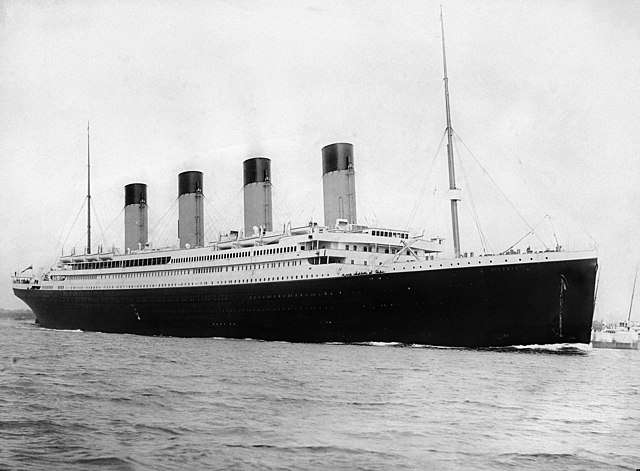

In [20]:
# Load the Titanic passenger survival dataset

filename = "https://raw.githubusercontent.com/clizarraga-UAD7/Datasets/main/titanic/full.csv"

df_titanic = pd.read_csv(filename)

# Print the dataset head
df_titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [8]:
# Basic dataframe info

df_titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

#### Variables description:

Below is a brief information about each columns of the dataset:

* **PassengerId**: An unique index for passenger rows. It starts from 1 for first row and increments by 1 for every new rows.

* **Survived**: Shows if the passenger survived or not. 1 stands for survived and 0 stands for not survived.

* **Pclass**: Ticket class. 1 stands for First class ticket. 2 stands for Second class ticket. 3 stands for Third class ticket.

* **Name**: Passenger's name. Name also contain title. "Mr" for man. "Mrs" for woman. "Miss" for girl. "Master" for boy.

* **Sex**: Passenger's sex. It's either Male or Female.

* **Age**: Passenger's age. "NaN" values in this column indicates that the age of that particular passenger has not been recorded.

* **SibSp**: Number of siblings or spouses travelling with each passenger.

* **Parch**: Number of parents of children travelling with each passenger.

* **Ticket**: Ticket number.

* **Fare**: How much money the passenger has paid for the travel journey.

* **Cabin**: Cabin number of the passenger. "NaN" values in this column indicates that the cabin number of that particular passenger has not been recorded.

* **Embarked**: Port from where the particular passenger was embarked/boarded.




In [9]:
# Print dataset shape (rows, columns)
df_titanic.shape


(1309, 21)

In [10]:
# Descriptive statistic for numerical variables

df_titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [11]:
# Similarly we apply the describe function to variables of type object

df_titanic.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked,Name_wiki,Hometown,Boarded,Destination,Lifeboat,Body
count,1309,1309,1309,295,1307,1304,1304,1304,1304,502,130
unique,1307,2,929,186,3,1303,566,4,291,24,130
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,"Kelly, Mr. James","New York, New York, US",Southampton,New York City,13,175MB
freq,2,843,11,6,914,2,70,916,234,42,1


In [12]:
# Sum missing values by column
df_titanic.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [13]:
# List the summary of passengers that Survived / Victims
# the len(dataframe) function, returns the number of rows.  

survived = df_titanic[df_titanic['Survived'] == 1]
did_not_survived = df_titanic[df_titanic['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(df_titanic)*100.0))
print ("Did not Survived: %i (%.1f%%)"%(len(did_not_survived), float(len(did_not_survived))/len(df_titanic)*100.0))
print ("Total passengers: %i"%len(df_titanic))



Survived: 342 (26.1%)
Did not Survived: 549 (41.9%)
Total passengers: 1309


In [16]:
# Print passengers by travel class

print('Pclass Travelers')
df_titanic.Pclass.value_counts()


Pclass Travelers


3    709
1    323
2    277
Name: Pclass, dtype: int64

In [17]:
# Return survival number by traveling class.
df_titanic.groupby('Pclass').Survived.value_counts().sort_values(ascending=False)


Pclass  Survived
3       0.0         372
1       1.0         136
3       1.0         119
2       0.0          97
        1.0          87
1       0.0          80
Name: Survived, dtype: int64

In [18]:
# Average surival rate by traveling class.
df_titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


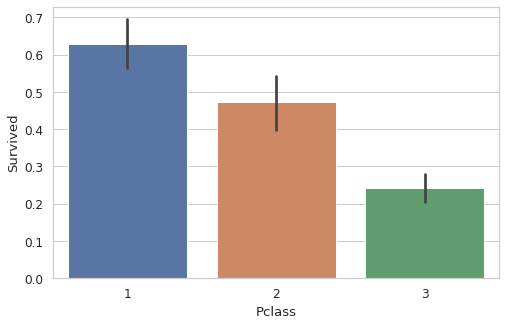

In [35]:
# Plotting survival

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#df_titanic.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=df_titanic);


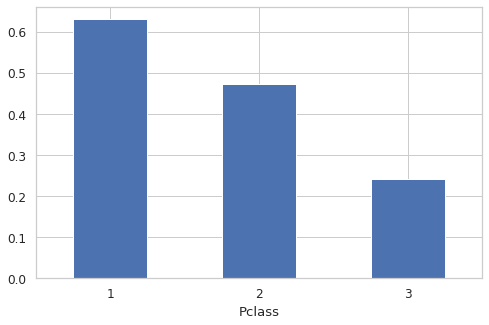

In [36]:
# We can have used the pandas plot function to get a simnilar plot
df_titanic.groupby('Pclass').Survived.mean().plot(kind='bar', rot=0);


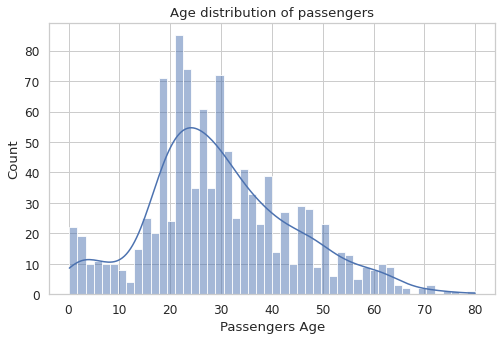

In [23]:
# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.histplot(
    df_titanic['Age'],   kde=True, bins=50
).set(xlabel='Passengers Age', ylabel='Count', title='Age distribution of passengers');

In [21]:
# Travelers by gender

df_titanic.Sex.value_counts()


male      843
female    466
Name: Sex, dtype: int64

In [22]:
# Survival by gender
df_titanic.groupby('Sex').Survived.value_counts()


Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

In [23]:
# Average survival rate by gender
df_titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()


,Sex,Survived
0,female,0.742038
1,male,0.188908


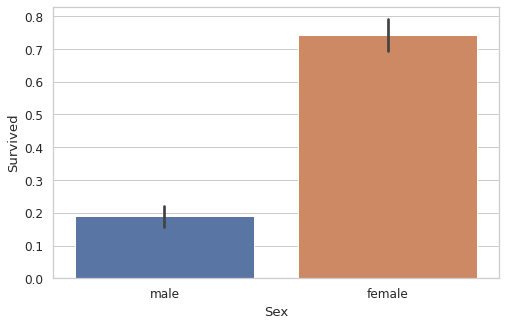

In [24]:
# Plot survival rate

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

#df_titanic.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=df_titanic);


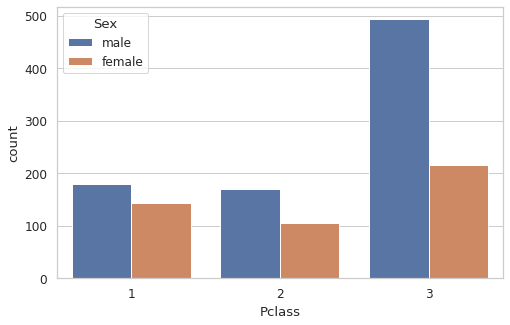

In [25]:
# Countplot: Distribution of Passangers by gender and class.

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.countplot(x ="Pclass", hue ="Sex", data =df_titanic);


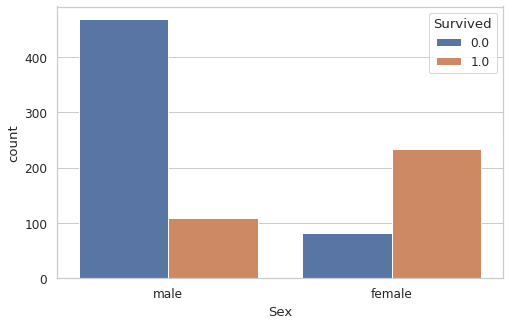

In [26]:
# Countplot

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.countplot(x ="Sex", hue ="Survived", data =df_titanic);


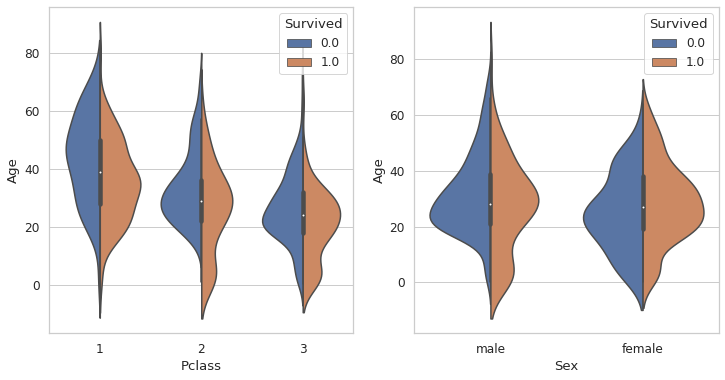

In [27]:
# Violinplots

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_titanic, split=True, ax=ax1)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_titanic, split=True, ax=ax2);


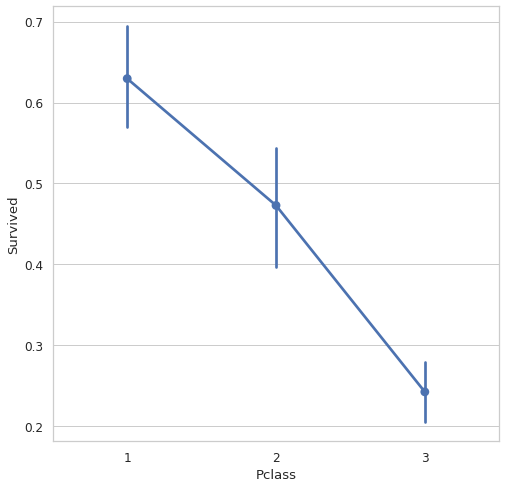

In [42]:
# Let's use a factor plot again, but now considering class

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]}) 

sns.pointplot(x='Pclass', y='Survived', data=df_titanic);


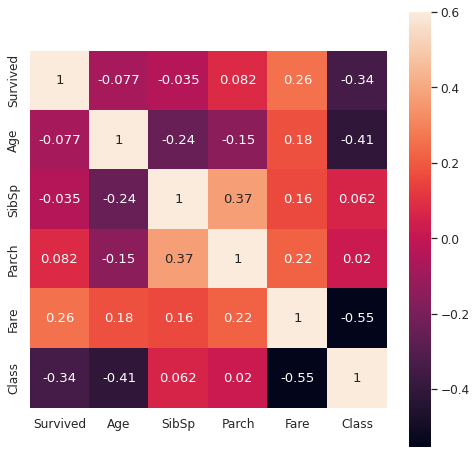

In [28]:
# Correlation heat map

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]}) 

sns.heatmap(df_titanic.drop(['PassengerId', 'WikiId', 'Age_wiki', 'Pclass'],axis=1).corr(), vmax=0.6, square=True, annot=True);


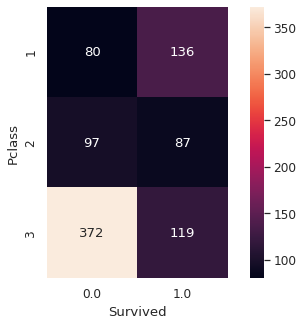

In [29]:
# Heatmap - Color encoded 2D representation of data.

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

# Group the dataset by Pclass and Survived and then unstack them
group = df_titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, square=True, fmt ="d");


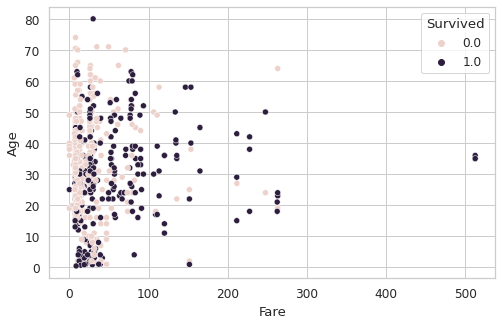

In [30]:
# Scatterplot

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.scatterplot(x="Fare", y="Age", hue="Survived", data=df_titanic);

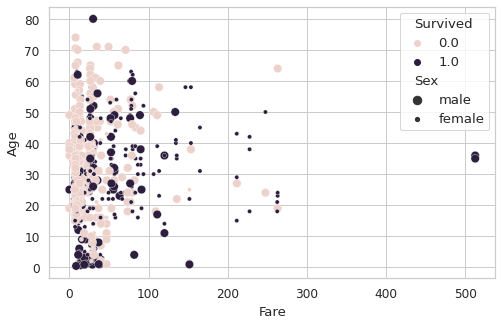

In [31]:
# Scatterplot 

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.scatterplot(x="Fare", y="Age", hue="Survived", size="Sex", data=df_titanic);

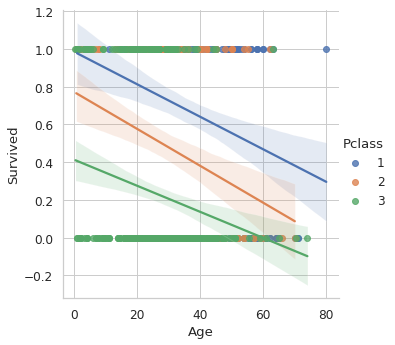

In [36]:
# Let's use a linear plot on age versus survival using hue for class seperation

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.lmplot(x='Age', y='Survived', hue='Pclass', data=df_titanic);


In [37]:
# Create a new column 'Person' in which every person under 16 is child.

df_titanic['Person'] = df_titanic.Sex
df_titanic.loc[df_titanic['Age'] < 16, 'Person'] = 'Child'
# Checking the distribution
print(f"Person categories : {df_titanic.Person.unique()}\n=================================")
print(f"Distribution of person : {df_titanic.Person.value_counts()}\n=================================")
print(f"Mean age : {df_titanic.Age.mean()}\n=================================")

Person categories : ['male' 'female' 'Child']
Distribution of person : male      784
female    410
Child     115
Name: Person, dtype: int64
Mean age : 29.881137667304014


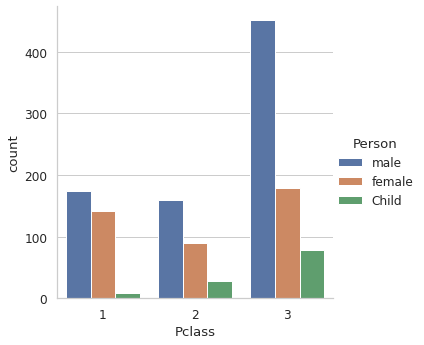

In [40]:
# Plot the passenger population

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.catplot(x='Pclass', data=df_titanic, hue='Person', kind='count');


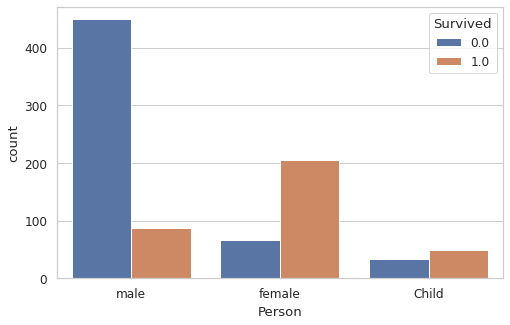

In [47]:
# Countplot

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

sns.countplot(x ="Person", hue ="Survived", data =df_titanic);

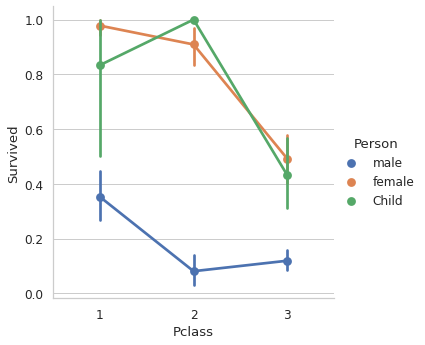

In [46]:
# Let's use a factor plot again, but now considering class and gender

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 8]}) 

sns.catplot(x='Pclass', y='Survived', data=df_titanic, hue='Person', kind='point');


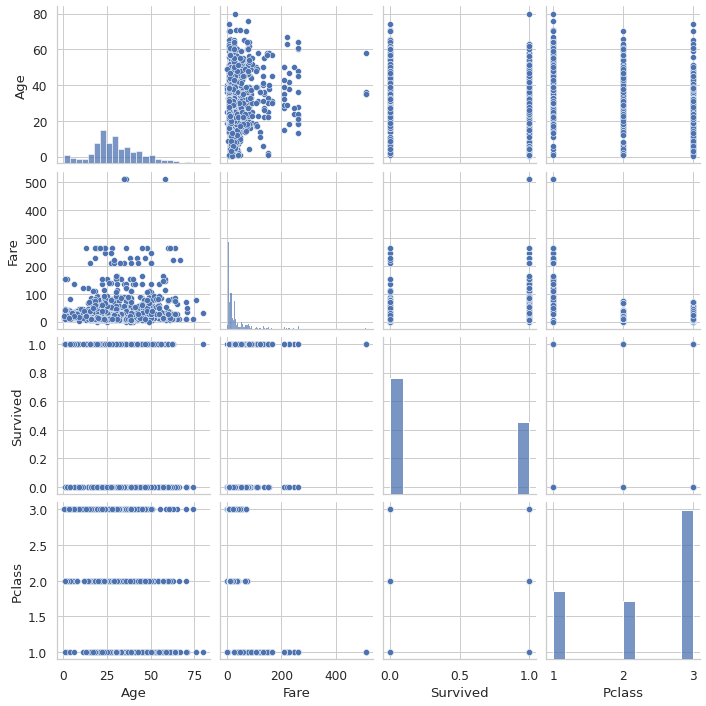

In [32]:
# Pairplot Example

# General plotting settings
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

to_plot = ['Age', 'Fare', 'Survived', 'Pclass']

df_to_plot = df_titanic.loc[:,to_plot]
sns.pairplot(df_to_plot);
